## Prueba Simulacion 


In [83]:
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv').fillna(0) 
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58907,0,0,International,2020-11-20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
58908,0,0,International,2020-11-21,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
58909,0,0,International,2020-11-22,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
58910,0,0,International,2020-11-23,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


In [84]:
ndf= df.loc[(df['location'] == 'Peru') & (df['total_cases'] != 0)] # filtrando por pais y total de casos
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1) # arreglo primer dia 
y=np.array(ndf1.values[:,1], dtype='float')

## regresion lineal

In [85]:

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(xl.reshape(-1,1), yl) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 4394.546331150448, b = -166441.21277529158
y = 4394.546331150448x -166441.21277529158


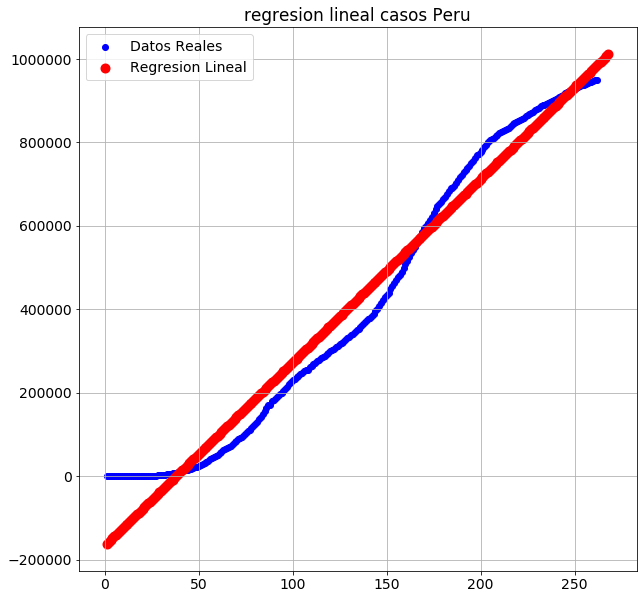

In [97]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(10, 10))
plt.scatter(xl,yl,label='Datos Reales', color='blue')
plt.grid(True)
plt.title('regresion lineal casos Peru');
x1=np.arange(1,len(ndf1l)+7,1)
y1=fun(x1)
plt.scatter(x1,y1,color='red',linewidth=4.0,label='Regresion Lineal')
plt.legend()
plt.show()

### Regresion Logaritmica 

In [87]:

from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression

xlog=x
ylog=y
ndf1log=ndf1

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,xlog,ylog) #Extraemos los valores de los paramatros

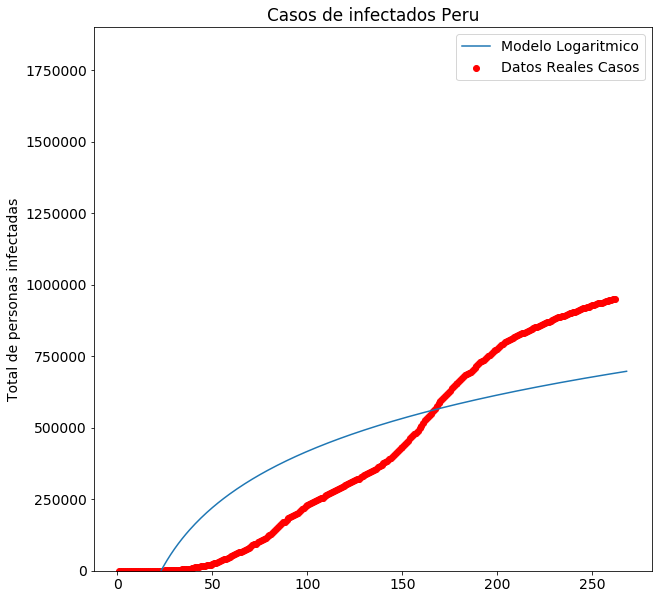

In [88]:
pred_x = list(range(min(xlog),max(xlog)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.scatter(xlog,ylog,label="Datos Reales Casos",color="red")
# Predicted exponential curve
pred_y=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.title('Casos de infectados Peru')
plt.plot(pred_x, pred_y, label="Modelo Logaritmico" )
plt.legend()
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

### Regresion Exponecia

[0.02975945 7.77860985]


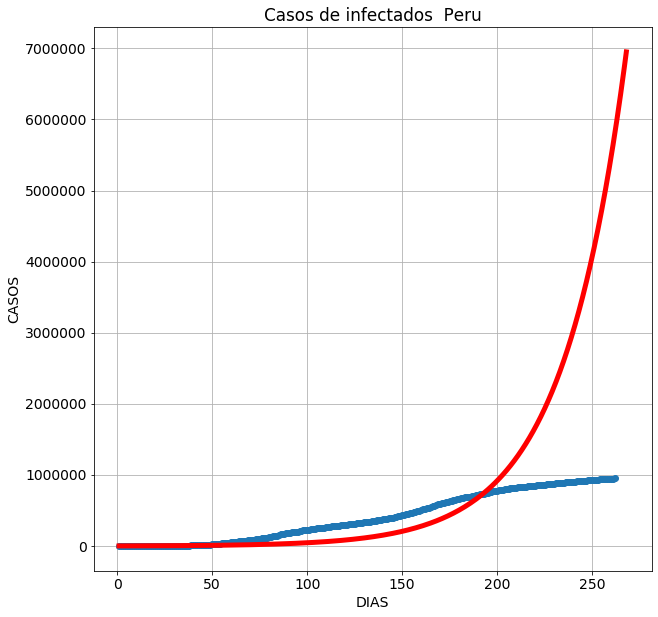

In [89]:
xexp=x
yexp=y
ndf1exp=ndf1

curve_fit=np.polyfit(xexp,np.log(yexp),1)
print(curve_fit)
pred_xe=np.array(list(range(min(xexp),max(xexp)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_xe)
plt.title('Casos de infectados  Peru')
plt.plot(xexp,yexp,"o")
plt.plot(pred_xe,yx,color='red',linewidth=5.0)
plt.xlabel('DIAS')
plt.ylabel('CASOS')
plt.grid(True)

### Modelo Polinomial

           6             5           4         3         2
7.836e-08 x - 6.436e-05 x + 0.01969 x - 2.861 x + 222.3 x - 5979 x + 3.537e+04


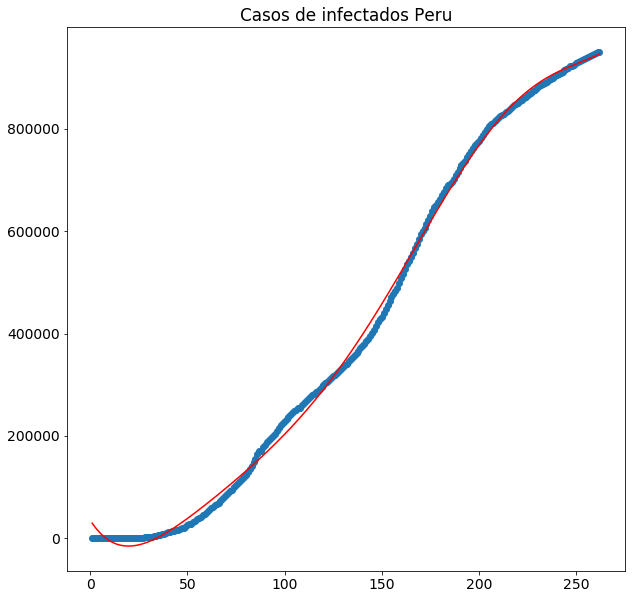

In [90]:
xpol=x
ypol=y
polndf1=ndf1
#Numero de Casos
fun1 = np.poly1d(np.polyfit(xpol, ypol, 6))
print(fun1)
y_pred=fun1(xpol)
plt.title('Casos de infectados Peru')
plt.scatter(xpol, ypol)
plt.plot(xpol, y_pred, c='r')  
plt.show()

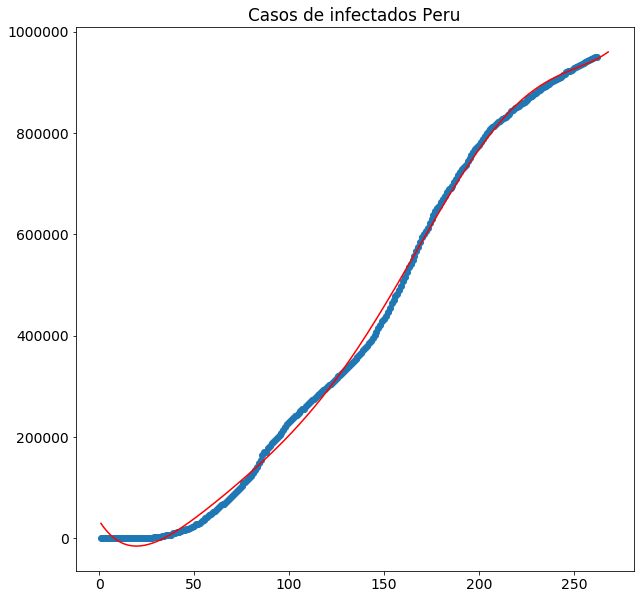

In [91]:
pred=np.array(list(range(min(xexp),max(xexp)+7)))
y_npred=fun1(pred)
plt.title('Casos de infectados Peru')
plt.scatter(xpol, ypol)
plt.plot(pred, y_npred, c='r')
plt.show()

## Modelo Probabilisticos

In [92]:

xpro=x
ypro=y
prondf1=ndf1

media = prondf1.values[:,1].mean()
mediana = np.median(prondf1.values[:,1])
print("MEDIA: ",media)
print("MEDIANA: ",mediana)

MEDIA:  411441.6297709924
MEDIANA:  339655.0


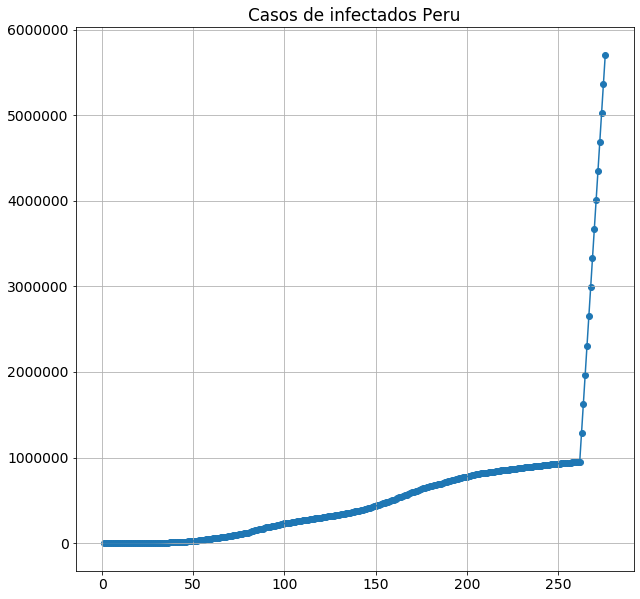

In [95]:
for it in range(int(xpro[-1]), int(xpro[-1]+7)):
    xpro=np.append(xpro,(it+1))
    ypro=np.append(ypro,ypro[-1] + mediana)
plt.title('Casos de infectados Peru')
plt.plot(xpro,ypro)
plt.scatter(xpro,ypro)
plt.grid(True)
plt.show()

### ◦	Deben calcularse las siguientes métricas:
▪	Total de infectados dentro de 7 dias (matematico y probabilistico).


In [94]:
print("Lineal: ", y1[len(y1)-1])
print("Logistica: ", pred_y[len(pred_y)-1])
print("Exponencial: ", yx[len(yx)-1])
print("Polinomial: ", y_npred[len(y_npred)-1])
print("Probabilistico: ", ypro[len(ypro)-1])

Lineal:  1011297.2039730286
Logistica:  697738.909975356
Exponencial:  6949246.252610128
Polinomial:  960507.4600255173
Probabilistico:  3328142.0


### conclusiones

##### •	Cual tiene una mejor prediccion.

dependiendo el caso puede variar los datos puede tomar una medida diferente siendo necesario implementar los casos y ver cuál es el que mejor se adapta a los datos.

en este caso el modelo que mejor se adapta es el polinomial

#####  •	Ventajas y desventajas de los modelos.

•	modelos lineales

ventajas
es el modelo más rápido que puede adaptarse a todo tipo de datos siendo mejor cuando las mismas no son muy complejas con un margen de error bastante bajo se puede entender de manera clara.

desventajas 
no permite el ingreso de las relaciones lineales si su debido tratamiento y no se puede evaluar datos complejos


•	modelo logarítmico 

ventajas 
rápido para entrenar permite entender de manera clara.

desventajas 
no capta relaciones complejas y las representa de manera muy sencilla 


•	modelo exponencial 

ventajas 
se ajusta de manera rápida a los crecimientos ya que el modelo sirve para modelizar el crecimiento de las poblaciones y la difusión epidémica de un rasgo entre una población.

desventajas
dado que se plantea solo un crecimiento este no tiene a disminuir. es muy difícil de implementar y desarrollar complicando el proceso.

•	modelo polinomial

ventajas
se adapta mejor sin importar si se cuenta con pocos datos o muchos datos. si los datos no son lineales de ajusta muy bien.

desventajas 
es necesario definir bien el grado de polinomio para tener un resultado más adecuado.


#####  •	Cual es el principal problema del modelo probabilístico.

el problema ratica en la cantidad de datos que puede manejar si estos son muy grandes puede legar a calcular datos con un rango muy grande y un error muy elevado prediciendo de manera errónea.

